<a href="https://colab.research.google.com/github/gregoriobattagliadata/Tensor_flow_data/blob/main/Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tensorflow + Keras _ Tutorial
KERAS TENSORFLOW TUTORIAL
Link:

https://www.youtube.com/watch?v=qFJeN9V1ZsI

1. Installazione tensorflow. Keras è oggi una libreria di TensorFlow

In [ ]:
pip install tensorflow

## Build a Sequential Model

Il sequential model riceve dati dal training set quando richiamiamo la fit fuction


### Data Preparation and Processing
dataset con 1 feature e una label:
Nx2

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

Dataset


- pazienti compresi tra o 13 e i 100 anni
- 2100 partecipanti
> - metà sotto i 65 anni
> - metà sopra i 65 anni

- 95% > 65 anni --> effetti collaterali (label = 1 )  5% == 0
- 95% < 65 anni -> NO effetti collaterali (label = 0 ) 5% == 1


In [ ]:
n_tot = 2100
half_tot = n_tot/2

five_perc = round(0.05*half_tot)
nintyfive_perc = round(0.95*half_tot)



for i in range(five_perc):
  random_youger = randint(13,64)
  train_samples.append(random_youger)
  train_labels.append(1)

for i in range(five_perc):
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(nintyfive_perc):
  random_youger = randint(13,64)
  train_samples.append(random_youger)
  train_labels.append(0)

for i in range(nintyfive_perc):
  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)


#### Passing data to numpy
Ogni colonna la passo come array

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

Rimescolo le righe, l'ordine viene mantenuto quando mando in input contemporanemento entrambi i vettori

In [ ]:
train_labels, train_samples = shuffle(train_labels, train_samples)

Normlaizzo: La rete diventa più veloce e più efficiente

>> .reshape(-1,1) : questo serve perchè fit_trasform prende in input solo dati 1D.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))


In [ ]:
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))


A questo punto ho un dataset disordinato con 1 feature e 1 label e le feature assumono valore compreso tra 0 e 1.

Queste features verranno usate per allenare la mia rete neurale artificiale.


##Create an Artificial Neural Network with TensorFlow's Keras API

### Simple tf.keras Sequential Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


Per verificare che la GPU del pc sia adeguata a far girare questa rete artificiale.

Qui su colab naturalmente non ho GPU.

In [ ]:
#physical_device = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available:", len(physical_device))
#tf.config.experimental.set_memory_growth(physical_device[0], True)


Creo il Sequential Model
- è un modello semplice:
> è un modello che si basa sulla classe Sequential

> è costituito da un insieme di livelli che associo al layer di tipo *Dense*.

> Dense: 
>> sta per un layer composto da neuroni *densamente* connessi

1. Il primo layer è nascosto perchè è l'input layer e non lo definiamo esplicitamente usando keras. Il layer di input è costituito dai dati di input stessi. Il modello interpreta i dati che gli arrivano, sa cosa si aspetta in input.
2. Il primo dense layer si aspetta in ingresso dei parametri che identifico con *input_shape= (1,)*.
Interprea la forma dei dati in input.
3. il primo hidden layer è composto da 16 unità, il secondo da 32, il terzo da 2. *Unità = neuroni*
L'ultimo layer è di output e i due nueroni sono le due possibilità di classificazione ( 0 || 1 )
4. imposto la funzione di attivazione che per i primi 2 è *relu* e per l'ultimo *softmax* = ci da la probabilità che un set di input sia classificato in classe 0 o 1.
*Indipendentemente dal fatto che un paziente abbia o meno effetti collaterali, avremo una probabilità di output per ogni classe mostrando secondo questo modello qual è la classifficazione e quanto si ritiene corretta.*

In [ ]:
model = Sequential([
                    Dense(units=16, input_shape = (1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax'),
                    ])

Per visualizzare le caratterisstiche del modello in maniera schematica:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Train an Artificial Neural Network with TensorFlow's Keras
il modulo *compile* prepara il modello per essere compilato.
Scegliamo la funzione che vogliamo impiegare per ottimizzare il problema.
*Adam* è molto comune come funzione epermette di ottimizzare con un tasso di apprendimento pari a 0.0001
il tipo di *loss* che vogliamo utilizzare è l'incrocio integrale sparo.
Vogliamo vedere la metrica *Accuracy*

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

fit function:
- x = input
- y = target
- batch = numero di campioni che devo elaborare di volta in volta
- epochs = il modello eseguirà il training su tutti i dati nel data set prima di compleare il processo ricostruzione totale
- verbose = opzione per vedere gli output ogni volta che eseguaiamo la fit function; 2 = livello di dettagli maggiore.


In [ ]:
model.fit(x = scaled_train_samples, y = train_labels, batch_size=10, epochs=30, shuffle= True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6586 - accuracy: 0.5410
Epoch 2/30
210/210 - 0s - loss: 0.6264 - accuracy: 0.6371
Epoch 3/30
210/210 - 0s - loss: 0.5904 - accuracy: 0.7300
Epoch 4/30
210/210 - 0s - loss: 0.5552 - accuracy: 0.7743
Epoch 5/30
210/210 - 0s - loss: 0.5210 - accuracy: 0.8052
Epoch 6/30
210/210 - 0s - loss: 0.4874 - accuracy: 0.8257
Epoch 7/30
210/210 - 0s - loss: 0.4558 - accuracy: 0.8562
Epoch 8/30
210/210 - 0s - loss: 0.4267 - accuracy: 0.8638
Epoch 9/30
210/210 - 0s - loss: 0.4012 - accuracy: 0.8790
Epoch 10/30
210/210 - 0s - loss: 0.3793 - accuracy: 0.8890
Epoch 11/30
210/210 - 0s - loss: 0.3598 - accuracy: 0.8914
Epoch 12/30
210/210 - 0s - loss: 0.3436 - accuracy: 0.8967
Epoch 13/30
210/210 - 0s - loss: 0.3307 - accuracy: 0.9005
Epoch 14/30
210/210 - 0s - loss: 0.3203 - accuracy: 0.9048
Epoch 15/30
210/210 - 0s - loss: 0.3119 - accuracy: 0.9086
Epoch 16/30
210/210 - 0s - loss: 0.3050 - accuracy: 0.9090
Epoch 17/30
210/210 - 0s - loss: 0.2994 - accuracy: 0.9148
Epoch 

### Build a Validation Set With TensorFlow's Keras API
basta aggiungere la voce *validation_split* alla funzione fit precedenmente usata


In [ ]:
model.fit(x = scaled_train_samples, y = train_labels, validation_split=
          0.1,batch_size=10, epochs=30, shuffle= True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2721 - accuracy: 0.9317 - val_loss: 0.2581 - val_accuracy: 0.9524
Epoch 2/30
189/189 - 0s - loss: 0.2716 - accuracy: 0.9323 - val_loss: 0.2576 - val_accuracy: 0.9524
Epoch 3/30
189/189 - 0s - loss: 0.2710 - accuracy: 0.9354 - val_loss: 0.2558 - val_accuracy: 0.9524
Epoch 4/30
189/189 - 0s - loss: 0.2705 - accuracy: 0.9312 - val_loss: 0.2551 - val_accuracy: 0.9524
Epoch 5/30
189/189 - 0s - loss: 0.2700 - accuracy: 0.9354 - val_loss: 0.2528 - val_accuracy: 0.9524
Epoch 6/30
189/189 - 0s - loss: 0.2694 - accuracy: 0.9333 - val_loss: 0.2548 - val_accuracy: 0.9524
Epoch 7/30
189/189 - 0s - loss: 0.2689 - accuracy: 0.9354 - val_loss: 0.2527 - val_accuracy: 0.9524
Epoch 8/30
189/189 - 0s - loss: 0.2685 - accuracy: 0.9354 - val_loss: 0.2510 - val_accuracy: 0.9524
Epoch 9/30
189/189 - 0s - loss: 0.2680 - accuracy: 0.9349 - val_loss: 0.2510 - val_accuracy: 0.9524
Epoch 10/30
189/189 - 0s - loss: 0.2676 - accuracy: 0.9354 - val_loss: 0.2491 - val_accuracy: 0.9524

### Neural Network Predictions with TensorFlow's Keras API
Inference:
il modello prende ciò che ha appreso durante l'addestramente utilizza tale conoscenza per dedurre informazioni su dati che non ha visto in precedenza

### Creazione del Test set 

In [ ]:
test_labels = []
test_samples = []

for i in range(five_perc):
  random_youger = randint(13,64)
  test_samples.append(random_youger)
  test_labels.append(1)

for i in range(five_perc):
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(nintyfive_perc):
  random_youger = randint(13,64)
  test_samples.append(random_youger)
  test_labels.append(0)

for i in range(nintyfive_perc):
  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [ ]:
scaleded_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Prediction

In [ ]:
prediction = model.predict(x=scaleded_test_samples, batch_size=10, verbose =0)

mostro a video

In [ ]:
for i in prediction:
  print(i)

[0.01614239 0.9838576 ]
[0.35406435 0.6459357 ]
[0.01772686 0.98227316]
[0.9701764 0.0298236]
[0.03096843 0.9690316 ]
[0.7527979  0.24720202]
[0.01772686 0.98227316]
[0.44518316 0.5548168 ]
[0.5401427  0.45985723]
[0.6753584  0.32464162]
[0.10813608 0.89186394]
[0.9583538  0.04164616]
[0.97058177 0.0294182 ]
[0.96910065 0.03089932]
[0.31179163 0.68820834]
[0.94626737 0.05373265]
[0.9631707  0.03682932]
[0.0535618 0.9464382]
[0.9704296  0.02957045]
[0.3987474 0.6012526]
[0.01469745 0.98530257]
[0.15103196 0.848968  ]
[0.9583538  0.04164616]
[0.0257354  0.97426456]
[0.940984   0.05901604]
[0.96952045 0.0304795 ]
[0.04468702 0.95531297]
[0.04079289 0.9592072 ]
[0.01946376 0.9805362 ]
[0.27243733 0.7275627 ]
[0.9666467  0.03335332]
[0.78652835 0.2134716 ]
[0.0257354  0.97426456]
[0.08350478 0.9164952 ]
[0.10813608 0.89186394]
[0.9204673  0.07953268]
[0.07003579 0.9299642 ]
[0.78652835 0.2134716 ]
[0.15103196 0.848968  ]
[0.9705649  0.02943508]
[0.20369461 0.79630536]
[0.7527979  0.24720202

trovo la predizione con la migliore probabilità

In [ ]:
rounded_predictions = np.argmax(prediction, axis = -1)

In [ ]:
for i in rounded_predictions:
  print(i)

1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
0
1
1
1
1
0
0
1
1
1
0
1
0
1
0
1
0
0
1
0
1
1
0
0
1
1
1
1
1
0
1
1
0
0
1
1
1
0
0
1
1
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
0
0
1
1
1
0
0
0
1
1
1
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
1
1
0
1
0
0
0
1
1
0
1
0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
0
0
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
0
0
1
1
0
1
1
1
0
0
0
0
0
1
0
0
1
1
1
1
1
0
0
1
1
1
0
1
1
0
1
0
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
1
1
0
1
0
1
1
1
0
1
1
0
0
0
1
1
1
1
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
0
1
0
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
1
1
1
1
0
0
1
0
0
0
0
1
1
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
1
1
0
1
0
0
1
0
0
1
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
0
1
0
1
0
1
1
1
0
0
1
0
1
1
1
0
1
0
0
1
1
0
1
0
0
1
1
0
0
1
1
1
1
1
0
1
1
0
1
1
0
1
0
0
1
0
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
0
1
1
0
1
0
0
1
0
0
0
1
1
0
0
1
0
1
1
1


Possiamo dare una predizione ma non sappiamo che senso dargli.
se ho corrispondenza tra l'ordine del data set e il test set allora posso creare la confiusion matrix

### Create a Confusion Matrix for Neural Network Predictions

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred= rounded_predictions)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Calcolo e Plotto

Confusion matrix, without normalization
[[984  66]
 [ 51 999]]


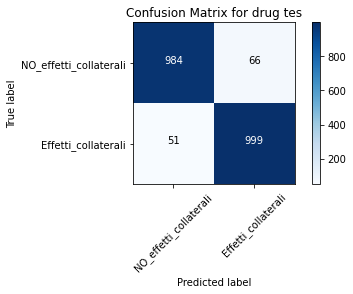

In [ ]:
cm_plot_labels = ['NO_effetti_collaterali','Effetti_collaterali']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix for drug tes')

### Save and Load a Model with TensorFlow's Keras API

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Ci sono vari modi per salvare un modello
####**1. model.save()**
---
Con questo metodo riesco a salvare:
- architettura del modello
- pesi associati ai neuroni
- loss, optimizer: configurazioni di training
- stato dell'optimizer

h5 è l'estensione per il modello.

In [ ]:
import os.path
if os.path.isfile('model/medical_trial_model.h5')is False:
  model.save('model/medical_trial_model.h5')

#### Loading

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('model/medical_trial_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


così facendo posso anche conoscere le singole caratteristiche del modello creato utilizzando queste righe

In [ ]:
new_model.get_weights()

[array([[ 0.49533668, -0.05807877, -0.37945116, -0.30327454, -0.22072613,
          0.20193318,  0.74942625,  0.56862444, -0.01400995, -0.05249399,
          0.52505994,  0.60881984,  0.02106464, -0.03746582,  0.6405395 ,
         -0.21034747]], dtype=float32),
 array([-0.10893982,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.09516887, -0.14787203, -0.19473962,  0.        ,  0.        ,
        -0.13153262, -0.19037808,  0.19672288,  0.23752232, -0.1978918 ,
         0.        ], dtype=float32),
 array([[ 1.27350152e-01, -1.55199811e-01,  1.29249886e-01,
          4.33970749e-01, -2.84705520e-01,  3.22923690e-01,
         -2.72636324e-01, -6.10054396e-02, -8.11095834e-02,
          3.29507113e-01,  2.93882906e-01,  3.42819467e-02,
         -2.34991267e-01, -1.63373291e-01,  2.25674719e-01,
          1.12065837e-01,  1.13444321e-01, -3.82013023e-01,
         -9.93983746e-02, -1.12437502e-01,  2.63794661e-01,
         -8.65236223e-02, -2.38557994e-01, -5.33681624e-02,
 

In [ ]:
new_model.optimizer

**2. model.to_json()**
non mi salva i pesi e le configurazioni di training.
solo l'architetturare del modello

In [ ]:
json_string = model.to_json()


In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

ricostruzione del modello a partire dal json

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


**3. model.save_weigths()**
salvo solo i pesi

In [ ]:
import os.path
if os.path.isfile('model/medical_trial_model.h5')is False:
  model.save('model/medical_trial_model.h5')

Creo un nuovo modello, in questo caso con le stesse caratteristiche di quello precedente

In [ ]:
model2 = Sequential([
                    Dense(units=16, input_shape = (1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax'),
                    ])

non ho bisogno di allenarlo perchè i pesi ce li ho slavati

In [ ]:
model2.load_weights('model/medical_trial_model.h5')

In [ ]:
model2.get_weights()

[array([[ 0.49533668, -0.05807877, -0.37945116, -0.30327454, -0.22072613,
          0.20193318,  0.74942625,  0.56862444, -0.01400995, -0.05249399,
          0.52505994,  0.60881984,  0.02106464, -0.03746582,  0.6405395 ,
         -0.21034747]], dtype=float32),
 array([-0.10893982,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.09516887, -0.14787203, -0.19473962,  0.        ,  0.        ,
        -0.13153262, -0.19037808,  0.19672288,  0.23752232, -0.1978918 ,
         0.        ], dtype=float32),
 array([[ 1.27350152e-01, -1.55199811e-01,  1.29249886e-01,
          4.33970749e-01, -2.84705520e-01,  3.22923690e-01,
         -2.72636324e-01, -6.10054396e-02, -8.11095834e-02,
          3.29507113e-01,  2.93882906e-01,  3.42819467e-02,
         -2.34991267e-01, -1.63373291e-01,  2.25674719e-01,
          1.12065837e-01,  1.13444321e-01, -3.82013023e-01,
         -9.93983746e-02, -1.12437502e-01,  2.63794661e-01,
         -8.65236223e-02, -2.38557994e-01, -5.33681624e-02,
 

## Image Preparation for CNNs with TensorFlow's Keras API

Carico il dataset


In [ ]:
!git clone https://github.com/gregoriobattagliadata/Tensor_flow_data

Cloning into 'Tensor_flow_data'...
remote: Enumerating objects: 24999, done.
remote: Counting objects: 100% (24999/24999), done.
remote: Compressing objects: 100% (24996/24996), done.
remote: Total 24999 (delta 1), reused 24996 (delta 1), pack-reused 0
Receiving objects: 100% (24999/24999), 541.49 MiB | 36.47 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (25001/25001), done.


### CNN - Convolutional Neural Network

Caricamento librerie

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)



### Data Preparation
Divido il dataset iniziale in:
- Training Set
- Test Set
- Validation Set

Punto la directory

In [ ]:
os.chdir('/content/Tensor_flow_data')

1. Controllo che la cartella esista
2. glob.glob(pathname, *, recursive=False)¶
Return a possibly-empty list of path names that match pathname, which must be a string containing a path specification. pathname can be either absolute (like /usr/src/Python-1.5/Makefile) or relative (like ../../Tools/*/*.gif), and can contain shell-style wildcards. 
3. shutil.move(src, dst, copy_function=copy2)¶
Recursively move a file or directory (src) to another location (dst) and return the destination.
4. Python method chdir() changes the current working directory to the given path.It returns None in all the cases

In [ ]:
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('valid/dog')
  os.makedirs('valid/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

  for c in random.sample(glob.glob('cat*'),500):
      shutil.move(c,'train/cat')
  for c in random.sample(glob.glob('dog*'),500):
      shutil.move(c,'train/dog')
  for c in random.sample(glob.glob('cat*'),100):
      shutil.move(c,'valid/cat')

  for c in random.sample(glob.glob('dog*'),100):
      shutil.move(c,'valid/dog')

  #Test set
  for c in random.sample(glob.glob('cat*'),50):
      shutil.move(c, 'test/cat' )
  
  for c in random.sample(glob.glob('dog*'),50):
      shutil.move(c,'test/dog')

os.chdir('../../')

In [ ]:
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('valid/dog')
  os.makedirs('valid/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

  for c in random.sample(glob.glob('cat*'),500):
      shutil.move(c,'train/cat')
  for c in random.sample(glob.glob('dog*'),500):
      shutil.move(c,'train/dog')
  for c in random.sample(glob.glob('cat*'),100):
      shutil.move(c,'valid/cat')

  for c in random.sample(glob.glob('dog*'),100):
      shutil.move(c,'valid/dog')

  #Test set
  for c in random.sample(glob.glob('cat*'),50):
      shutil.move(c, 'test/cat' )
  
  for c in random.sample(glob.glob('dog*'),50):
      shutil.move(c,'test/dog')

os.chdir('../../')

Suddivido le immagini nelle varie cartelle che ho appena creato.

Per semplicità uso solo 1000 immagini 

Creo dei percorsi che salvo in delle variabili per usarle in seguito

In [ ]:
train_path = '/content/Tensor_flow_data/train'
valid_path ='/content/Tensor_flow_data/valid'
test_path = '/content/Tensor_flow_data/test'

Converto i dati in un formato che il modello si aspetta

suddivido i dati in batch che potranno essere passati al sequential model tramite la fit function

preprocessing_function=tf.keras.applications.vgg16.preprocess_input
> Funzione che applica una pre elaborazione dell'immagine per renderla interpretavile al modello.


- Come directory per l'elaborazione nel primo caso uso la cartella di training con un target 224,224 = altezza e larghezza del sottogruppo di immagini che mi evidenzierà il cane o il gatto.
> Ridimensiona tutte le immagini con la stessa dimensione.

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
      .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.


In [ ]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
      .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

Found 200 images belonging to 2 classes.


shuffle = per accedere ad un test set con labels instabili

In [ ]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
      .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle = False)

Found 100 images belonging to 2 classes.


assert:

The assert statement exists in almost every programming language. It helps detect problems early in your program, where the cause is clear, rather than later when some other operation fails.

When you do...

assert condition
... you're telling the program to test that condition, and immediately trigger an error if the condition is false.

In [ ]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100


Qua dico quante sono le classi che mi interessa individuare.
è un classificatore binario.

In [ ]:
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

Prendo un singolo sottogruppo di immagini (batch).
La funzione next() restituisce l'elemento successivo dall'iteratore.
ho impostato che la dimensione del batch è 10.

In [ ]:
imgs, labels = next(train_batches)

Funzione per plottare le immagini a partire da una grid di 1 riga e 10 colonne.

In [ ]:
# def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=16)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show

uso la funzione presa dal sito tensorflow per plottare le immagini per ogni batch preso prima.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


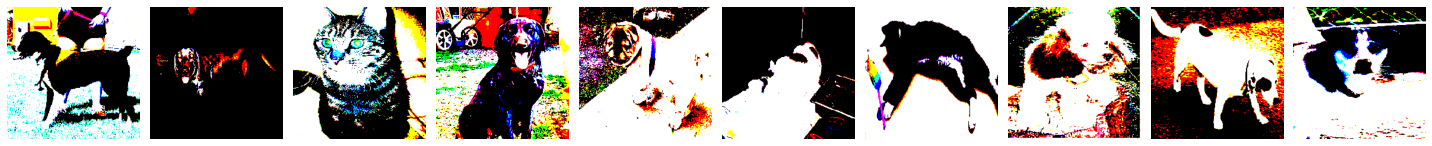

In [ ]:
plotImages(imgs)
print(labels)

## Build and Train a CNN
- padding 'same' = zero padding : la dimensionalità delle immagini non viene ridotta dopo le operazioni di convoluzione.

- Per gestire i bordi:
Se paddingè diverso da zero, l'input è implicitamente riempito di zero su entrambi i lati per il paddingnumero di punti. dilationcontrolla la spaziatura tra i punti del kernel. È più difficile da descrivere, ma questo collegamento ha una bella visualizzazione di ciò che dilationfa.

- la seconda rete di convoluzione viene solitamente scelta più grande rispetto al filtro precedente:
> 32 --> 64 --> 128 --> etc

- Dense mi fa passare ad un valore unidimensionale così da permettermi la classificazione.

- l'output sarà il più probabile corrispondente al modello = softmax 

In [ ]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2,2),strides=2),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2),strides=2),
        Flatten(),
        Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

Preparazione al training

- l'Approccio con categorical_crossentropy permette di calssificare problemi multiclasse ma nel caso binario si può ridurre all'utilizzo del valore binary_crossentropy interpretabile in fase di output tramite una funzione sigmoide.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
    x =train_batches,
    validation_data= valid_batches,
    epochs=10,
    verbose = 2
)

Epoch 1/10
100/100 - 66s - loss: 26.9704 - accuracy: 0.5510 - val_loss: 7.6996 - val_accuracy: 0.5350
Epoch 2/10
100/100 - 65s - loss: 2.8005 - accuracy: 0.7340 - val_loss: 3.6187 - val_accuracy: 0.6250
Epoch 3/10
100/100 - 65s - loss: 0.4631 - accuracy: 0.9010 - val_loss: 3.0656 - val_accuracy: 0.6350
Epoch 4/10
100/100 - 65s - loss: 0.1359 - accuracy: 0.9600 - val_loss: 1.9262 - val_accuracy: 0.6900
Epoch 5/10
100/100 - 65s - loss: 0.1486 - accuracy: 0.9550 - val_loss: 2.0004 - val_accuracy: 0.6700
Epoch 6/10
100/100 - 65s - loss: 0.0335 - accuracy: 0.9880 - val_loss: 1.7722 - val_accuracy: 0.6850
Epoch 7/10
100/100 - 65s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.7631 - val_accuracy: 0.6950
Epoch 8/10
100/100 - 65s - loss: 5.2060e-04 - accuracy: 1.0000 - val_loss: 1.7605 - val_accuracy: 0.7000
Epoch 9/10
100/100 - 65s - loss: 4.0359e-04 - accuracy: 1.0000 - val_loss: 1.7592 - val_accuracy: 0.7000
Epoch 10/10
100/100 - 65s - loss: 3.4510e-04 - accuracy: 1.0000 - val_loss: 1.7622

### Prediction
Evaluate outcomes on Test Set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


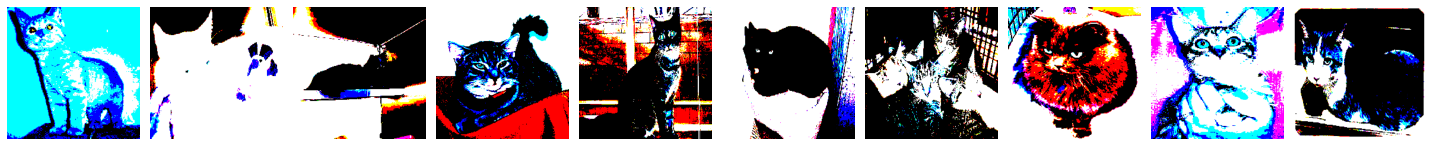

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

sono tutti gatti perchè i primi 10 sono gatti dato che non ho messo shuffle.

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
prediction = model.predict(x=test_batches, verbose = 0)

In [ ]:
np.round(prediction) # perchè sono in percentuale tra 0 e 1 e io voglio una classificazione

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred= np.argmax(prediction,axis=-1))

Funzione per plottare la confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[33 17]
 [19 31]]


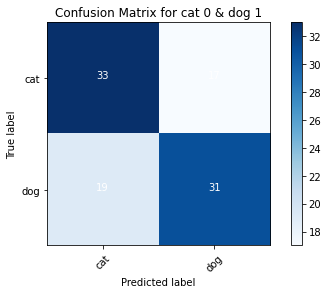

In [ ]:
cm_plot_labels=['cat', 'dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix for cat 0 & dog 1')

## Build a Fine-Tuned Neural Network with TensorFlow's Keras API

VGG16 model

In [ ]:

vgg16_model = keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 7s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

keras.engine.functional.Functional

Creo un nuovo modello a partire dai layer di quello esistente vgg16

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

NameError: ignored

In [ ]:
model.summary()

Qui l'idea è che i layer già allenati e trainable non li vado a riallenare --> li freezo
lavoro solo sugli untrainable

In [ ]:
for layer in model.layers:
  layer.trainable = False

Qua aggiungiamo il livello di output binario.
Il modello iniziale è impostato per distinguere 1000 classi.
Devo addestrare solo questo livello

In [ ]:
model.add(Dense(units=2,activation='softmax'))

In [ ]:
model.summary()

###**Train a Fine-Tuned Neural Network with TensorFlow's Keras API**

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(x =train_batches,validation_data= valid_batches,epochs=5,verbose = 2 )

In [ ]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

###**Predict using fine-tuned VGG16 model**

In [ ]:
predictions = model.predict(x=test_batches, verbose =0)

In [ ]:
test_batches.classes

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [ ]:
cm_plot_labels=['cat', 'dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels)

## MobileNet Image Classification with TensorFlow's Keras API

La dimnesione è dovuta al numero di parametri: è un modello di rete di dimensioni più piccole rispetto al VGG16.
 

Carico le librerie che userò
- backend:

-  imagenet_utils:
 - decode_predictions(...): Decodes the prediction of an ImageNet model.

 - preprocess_input(...): Preprocesses a tensor or Numpy array encoding a batch of images.

 - itertools: This module implements a number of iterator building blocks

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


Scarico la MobileNet che è presente in Keras

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()

Pre-processing delle immagini a partire dai file contenuti in MobileNet.
Implemento una funzione 

In [ ]:
def prepare_image(file):
  img_path='MobileNet-samples'
  img = tf.keras.utils.load_img(img_path + file, target_size=(224, 224))
  img_array =image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis = 0) #mobile net si aspetta questa dimensione
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims) #ridimensione i valori RGB per arrivare a 255.  

Importo una libreria che mi permette di vedere le immagini .PNG provenienti dalla directory MobileNet.

In [ ]:
# from IPython.display import Image

# # Image(filename='/content/sample_data/MobileNet-samples/1.PNG', width = 300, height=200)
# Image(filename='data/MobileNet-samples/1.PNG', width = 300, height=200)

FileNotFoundError: ignored